In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction of mental health of employees

Prediction model could be use in real life for identifying mental health risks in advance

<b> Steps</b>
1. Data analysis<br>
2. Data preparation<br>
3. Regression model selection<br>
4. Regression model optimization

In [9]:
df_raw = pd.read_csv('train.csv')

<li>Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
<li>Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
<li>Gender: The gender of the employee (Male/Female)
<li>Company Type: The type of company where the employee is working (Service/Product)
<li>WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
<li>Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
<li>Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)
<li>Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
<li>Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out

In [10]:
df_raw.describe(include='all')

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750,22750,22750,22750,22750.000000,21369.000000,20633.000000,21626.000000
unique,22750,366,2,2,2,NaN,NaN,NaN,NaN
top,fffe31003700360030003500,2008-01-06,Female,Service,Yes,NaN,NaN,NaN,NaN
freq,1,86,11908,14833,12290,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.178725,4.481398,5.728188,0.452005
std,NaN,NaN,NaN,NaN,NaN,1.135145,2.047211,1.920839,0.198226
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,4.600000,0.310000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,4.000000,5.900000,0.450000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,7.100000,0.590000


In [11]:
pd.DataFrame({'Data_type' : df_raw.dtypes, 'Nulls' : df_raw.isnull().sum()})

,Data_type,Nulls
Employee ID,object,0
Date of Joining,object,0
Gender,object,0
Company Type,object,0
WFH Setup Available,object,0
Designation,float64,0
Resource Allocation,float64,1381
Mental Fatigue Score,float64,2117
Burn Rate,float64,1124


<li>Logical data, no obvious issues with numerical of categorical features. <br>
<li>Resource allocation and Mental Fatique score as well as the target variable Burn rate contain Nulls. These will be removed
<li> Date of Joining is of string type, and needs to be changed to numerical before model creation 


In [12]:
### Drop nulls
df_raw = df_raw.dropna()

In [13]:
df_raw['Date of Joining'] = pd.to_datetime(df_raw['Date of Joining'])

In [14]:
df_raw['Year of Joining'] = df_raw['Date of Joining'].dt.year

Data only from year 2008, drop column

In [15]:
df_raw.drop(columns=['Year of Joining','Date of Joining'], inplace=True)

### Numerical feature analysis

In [16]:
df_numerical = df_raw.select_dtypes(['float64', 'int64'])

In [17]:
def num_subplots_historam(df):
    
    '''
    Generates histograms for numerical features
    '''
    no_features = len(df.columns)
    
    fig, axs = plt.subplots(no_features, 1, figsize=(8, no_features*3))
    fig.tight_layout()
    
    for col, current_ax in enumerate(axs):
        #df = df.sort_values(by = df.columns[col])[1000:-1000]
        sns.histplot(df, x=df.columns[col], ax=current_ax, palette='rocket')

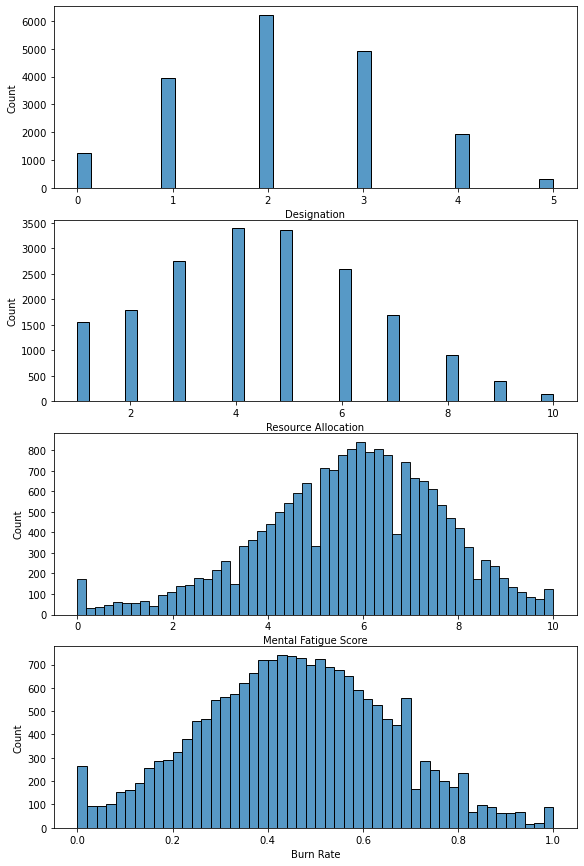

In [18]:
num_subplots_historam(df_numerical)

##### No major outliers, good quality data

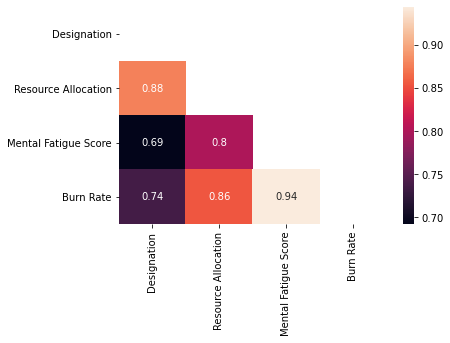

In [34]:
sns.heatmap(df_numerical.corr(), annot=True, mask = np.triu(df_numerical.corr()));

Strong correlations between numerical features, which also correlate stronly with the target variable Burn Rate

### Categorical feature analysis

In [30]:
def cat_features_100_plots(df):
    no_features = len(df.columns)
    columns = df.columns

    fig, axs = plt.subplots(no_features, 1, figsize=(10, no_features*3))
    fig.tight_layout()

    for col_no, current_ax in enumerate(axs):
        
        sns.countplot(x=columns[col_no], data=df,ax=current_ax, palette='rocket')

In [31]:
df_categorical = df_raw.select_dtypes(['object'])


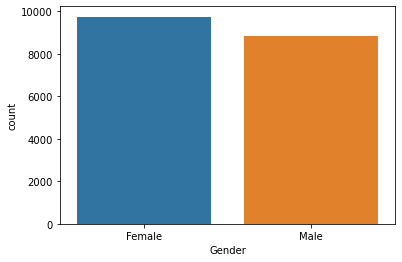

In [38]:
sns.countplot(x='Gender', data=df_categorical);

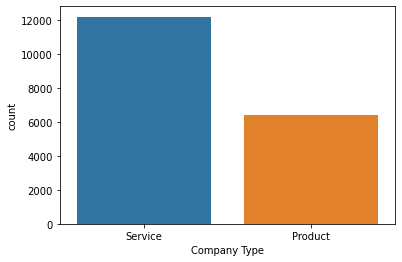

In [39]:
sns.countplot(x='Company Type', data=df_categorical);

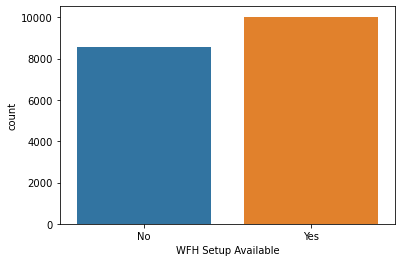

In [41]:
sns.countplot(x='WFH Setup Available', data=df_categorical);

Categorical features well balanced

### Prediction model

##### Data preprosessing

In [45]:
features = df_raw.drop(columns=['Burn Rate','Employee ID'])
y = df_raw['Burn Rate']

#OneHot to deal with categorical variables

features_onehot = pd.get_dummies(features)

#Feature scaling of (numerical) features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = StandardScaler().fit_transform(features_onehot)

#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.33, random_state=42)

##### Final correlation matrix after creating dummy variables

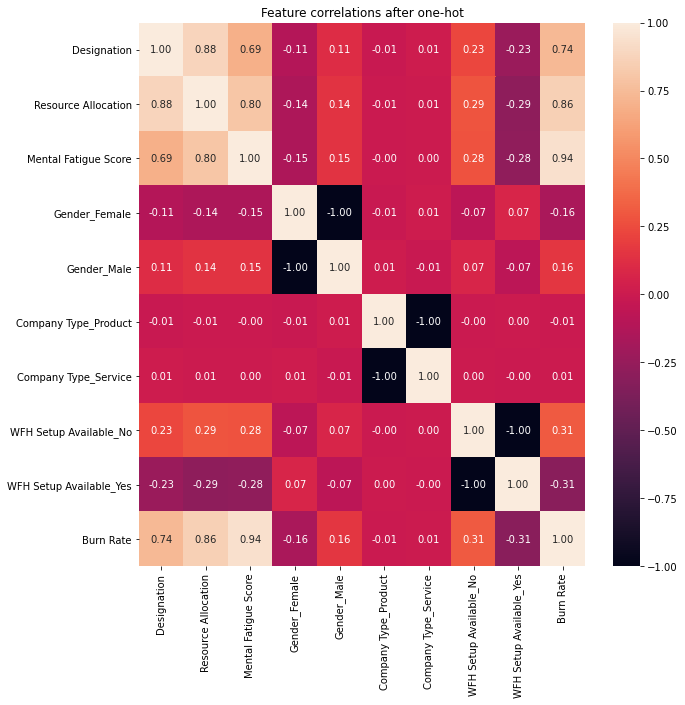

In [62]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(features_onehot.merge(y, left_index=True, right_index=True).corr(), annot=True, fmt='.2f', ax=ax);
plt.title('Feature correlations after one-hot');
plt.savefig('Burn Out feature correlations')

Few features have very strong positive correlation with Burn Rate, and Work From Home -setup availabiliy a clear negative correlation

#### GradientBoostingRegressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

print('GradientBoostingRegressor R2-score for test data {:2f}'.format(GBR.score(X_test,y_test)))

GradientBoostingRegressor R2-score for test data 0.927173


### Very good initial results! 
R2 could possibly be improved with hyperparameter turing

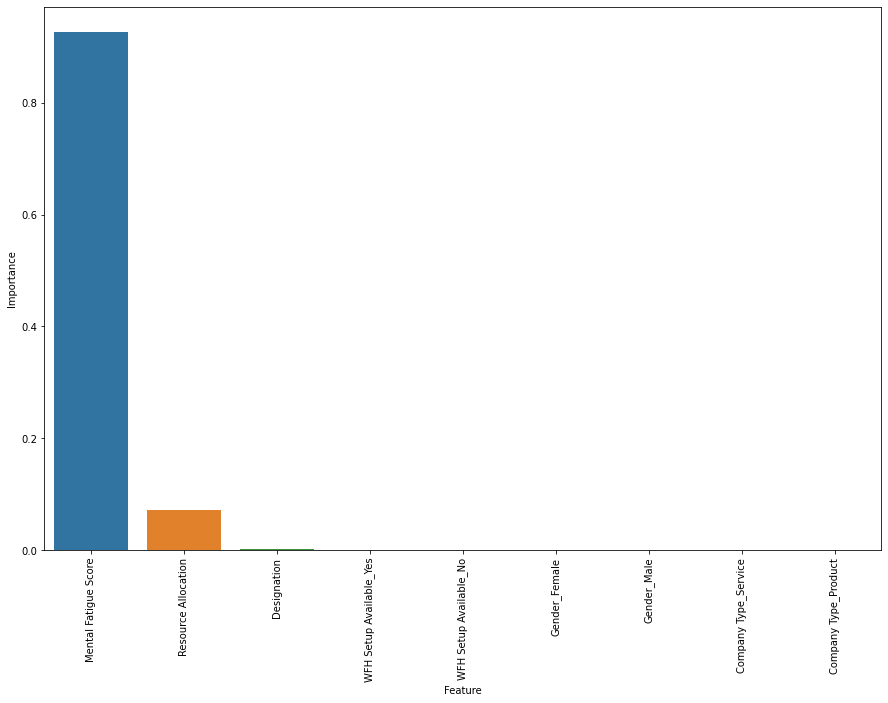

In [71]:
df_features = pd.DataFrame({'Feature' : features_onehot.columns, 'Importance' : GBR.feature_importances_}).sort_values(by='Importance', ascending = False)

fix, ax = plt.subplots(figsize =(15,10))
sns.barplot(x = df_features['Feature'], y = df_features['Importance'], ax=ax,)
ax.tick_params(axis='x', labelrotation=90)
plt.savefig('feature_importances')